<a href="https://colab.research.google.com/github/thmainagig/AssemblyScriptContract/blob/main/linReg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-101-440d63108595>:13: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  cost[col] = cost[col].astype(str).str.replace(char, "")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release_Date           5391 non-null   object
 2   Movie_Title            5391 non-null   object
 3   USD_Production_Budget  5391 non-null   int64 
 4   USD_Worldwide_Gross    5391 non-null   int64 
 5   USD_Domestic_Gross     5391 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 252.8+ KB


0.02937258620576877

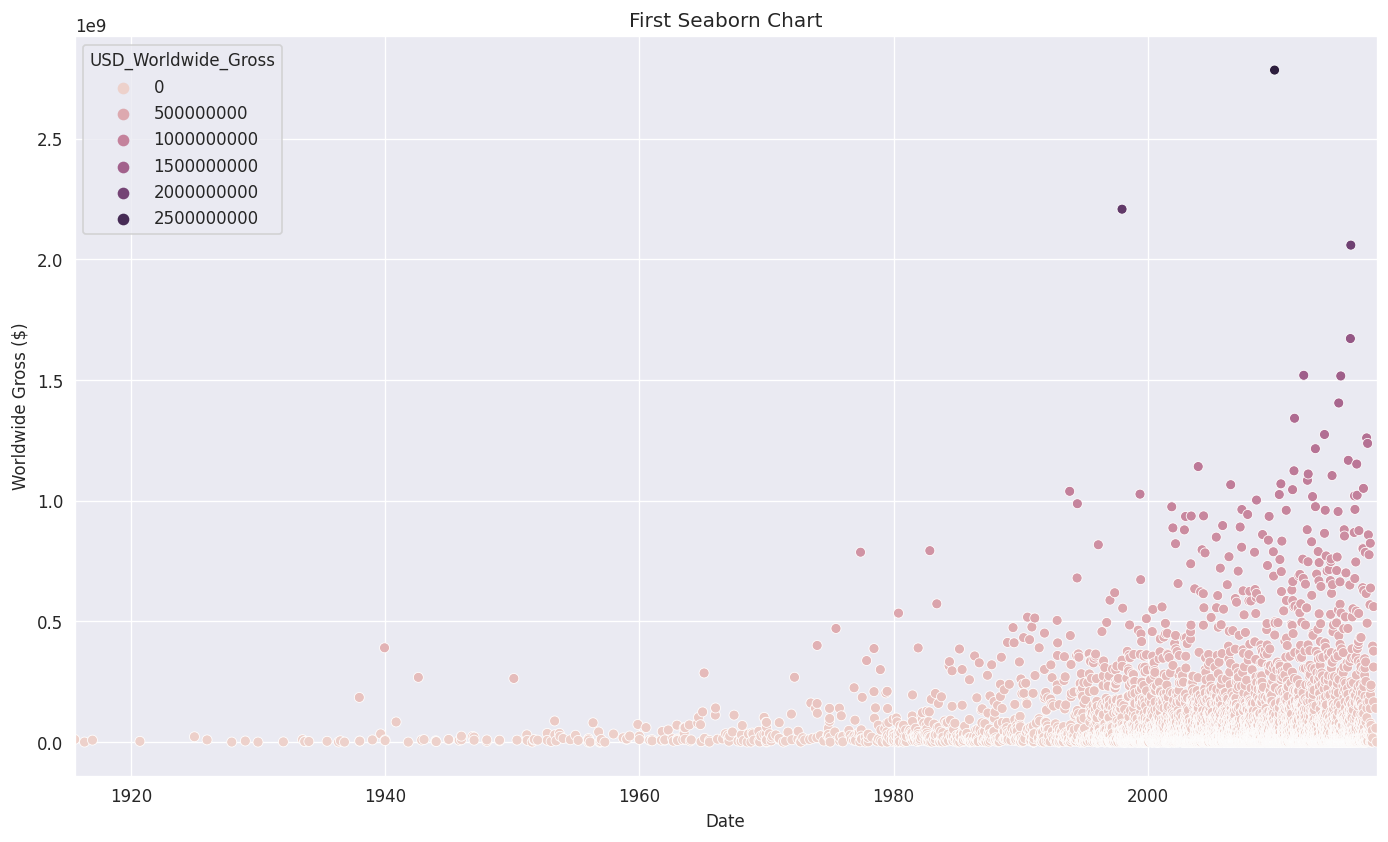

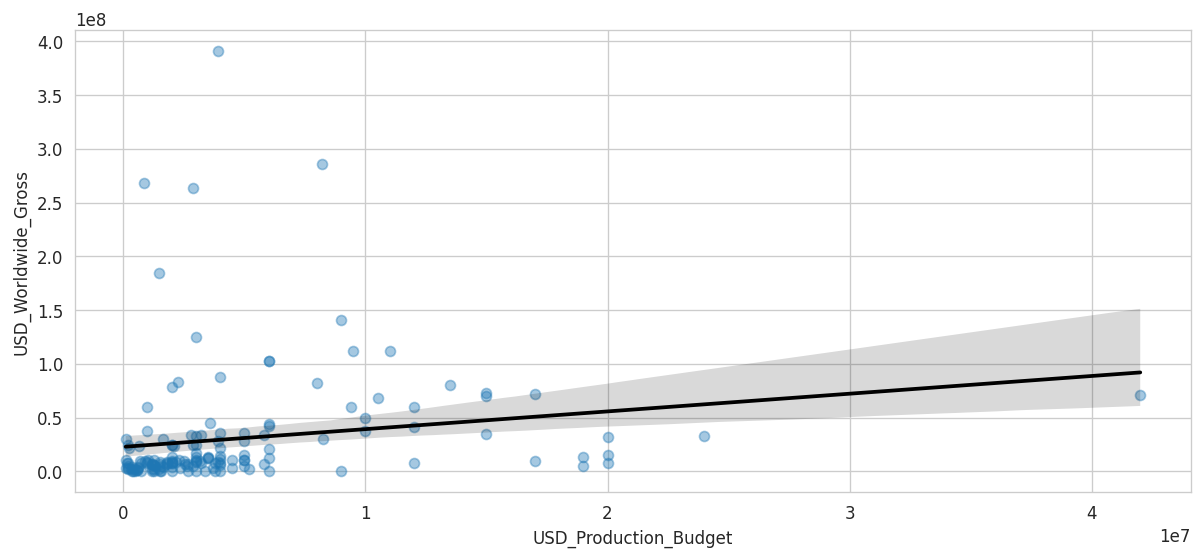

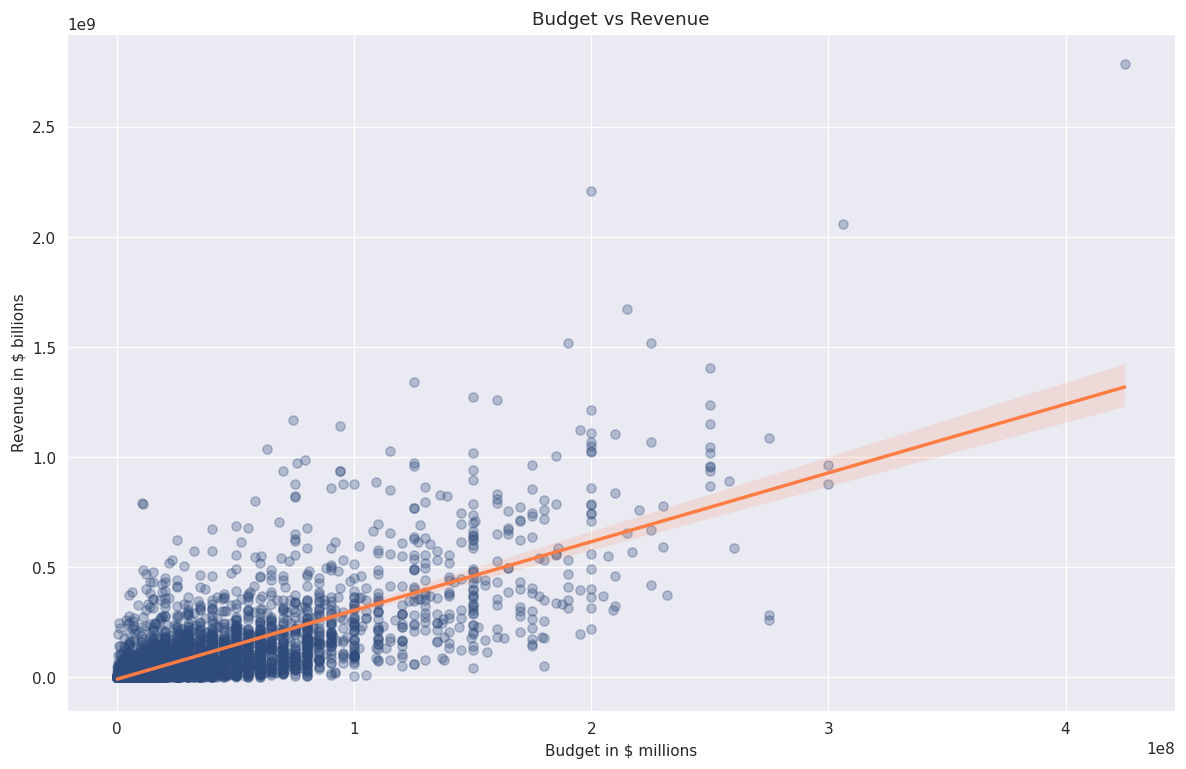

In [101]:
import pandas as pd
import matplotlib.pyplot as plt

cost = pd.read_csv('/content/Seaborn Linear Regression/cost_revenue_dirty.csv')
cost.shape
cost.head()
cost.isna().values.any()
cost.duplicated().values.any()
chars_to_remove = [',','$']
columns_remove = ['USD_Domestic_Gross', 'USD_Production_Budget', 'USD_Worldwide_Gross']
for col in columns_remove:
  for char in chars_to_remove:
    cost[col] = cost[col].astype(str).str.replace(char, "")
  cost[col] = pd.to_numeric(cost[col])
cost.head()
cost.info()
cost['Release_Date'] = pd.to_datetime(cost['Release_Date'])
cost.USD_Production_Budget.sum()/len(cost.USD_Production_Budget)
cost.USD_Worldwide_Gross.mean()
cost.USD_Domestic_Gross.mean()
cost.tail(len(cost.USD_Domestic_Gross/0.25))
cost.USD_Production_Budget.max()
cost.USD_Worldwide_Gross.max()
cost.describe()
x = cost[cost.USD_Domestic_Gross == 0]
x.sort_values('USD_Production_Budget' ,ascending=False)
x1 = cost[cost.USD_Worldwide_Gross == 0]
x1.sort_values('USD_Production_Budget', ascending=False)
cost.loc[(cost.USD_Worldwide_Gross!=0) & (cost.USD_Domestic_Gross == 0)]
df = pd.DataFrame(cost)
df.query('USD_Domestic_Gross == 0 and USD_Worldwide_Gross != 0')
df.query('USD_Domestic_Gross == 0 and USD_Worldwide_Gross == 0')
scrape_date = pd.Timestamp('2018-05-01')
unreleased = cost[cost.Release_Date >= scrape_date]
clean_database = cost.drop(unreleased.index)
loss_movies = clean_database.loc[clean_database.USD_Production_Budget > clean_database.USD_Worldwide_Gross]
100*(len(loss_movies)/len(clean_database))
import seaborn as sns

plt.figure(figsize=(14,8), dpi=120)
with sns.axes_style('darkgrid'):
  fig = sns.scatterplot(clean_database, y='USD_Worldwide_Gross', x='Release_Date', hue='USD_Worldwide_Gross', color='USD_Worldwide_Gross')
  fig.set(title=('First Seaborn Chart'), xlabel=('Date'), ylabel=('Worldwide Gross ($)'), xlim=(clean_database.Release_Date.min(), clean_database.Release_Date.max()))

date_index = pd.DatetimeIndex(clean_database.Release_Date)
years = date_index.year
decades = years//10*10
clean_database['Decade'] = decades
old_films = clean_database[clean_database.Decade<1970]
new_films = clean_database[clean_database.Decade>=1970]
old_films.sort_values('USD_Production_Budget', ascending=False)
plt.figure(figsize=(12,5), dpi=120)
with sns.axes_style('whitegrid'):
  sns.regplot(data = old_films, x='USD_Production_Budget', y='USD_Worldwide_Gross', scatter_kws ={'alpha':0.4}, line_kws={'color':'black'})

plt.figure(figsize=(13,8), dpi=110)
with sns.axes_style('darkgrid'):
  fig = sns.regplot(new_films, x='USD_Production_Budget', y='USD_Worldwide_Gross', color='#2f4b7c', scatter_kws={'alpha':0.3}, line_kws={'color': '#ff7c43'})
  fig.set(title=('Budget vs Revenue'), xlabel='Budget in $ millions', ylabel='Revenue in $ billions')
from sklearn.linear_model import LinearRegression

regression = LinearRegression()
X = pd.DataFrame(new_films, columns=['USD_Production_Budget'])
y = pd.DataFrame(new_films, columns=['USD_Worldwide_Gross'])
regression.fit(X,y)
regression.intercept_
regression.coef_
regression.score(X,y)
a = pd.DataFrame(old_films, columns=['USD_Production_Budget'])
b = pd.DataFrame(old_films, columns=['USD_Worldwide_Gross'])
regression.fit(a,b)
regression.intercept_
regression.coef_
regression.score(a,b)